In [2]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import loadtxt

In [3]:
a = open("falling.txt") # abro el archivo donde está el valor de t en la primera columna y 
# y el valor de y en la segunda columna

#creacion de posiciones para t e y
t = [] 
y = []
# lectura de los datos de falling
for line in a:
    rline = line.rstrip('\n').split()
    if len(rline) == 2:
        if rline[0] != "//":
            t.append(float(rline[0]))
            y.append(float(rline[1]))
# vuelvo la lista un arreglo para mejor  manipulación
t = np.array(t)
y = np.array(y)

/home/roberto/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


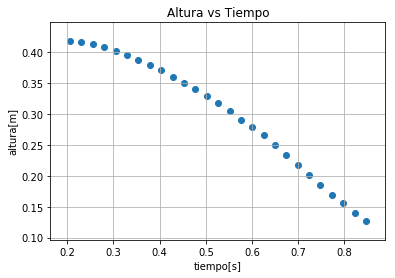

In [4]:
plt.scatter(t,y)
plt.grid('true')
plt.ylabel('altura[m]')
plt.title('Altura vs Tiempo')
plt.xlabel('tiempo[s]')
plt.show()

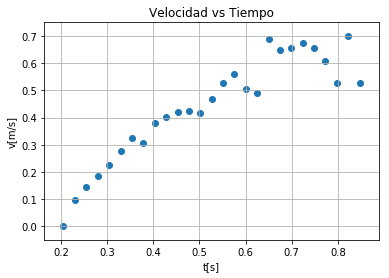

In [10]:
dt = t[1]-t[0] #se determina el intervalo de tiempo del registro de datos
#arreglos en cero de velocidad y aceleración
v = np.zeros(len(t), dtype = float)
a = np.zeros(len(t), dtype = float)
# usando diferencias finitas de primer orden atrasadas, se determina la velocidad
for i in range(1,len(t)):
    v[i] = abs((y[i]-y[i-1])/(dt))
    


plt.scatter(t,v)
plt.title('Velocidad vs Tiempo')
plt.xlabel('t[s]')
plt.ylabel('v[m/s]')
plt.grid('on')
plt.show()

Apesar de la dispersión de los datos, se alcanza a apreciar una tendencia a que la velocidad no aumente, esta velocidad constante representa la velocidad terminal.
Si se toma la ecuación diferencial que modela el movimiento se tiene :
\begin{equation}
\frac{dv}{t}=g-\frac{c_{1}}{m}v
\end{equation}
Cuando $\frac{dv}{dt}=0$ se tiene la velocidad terminal. Cuanto esto ocurre se obtiene: 
\begin{equation}
v_{terminal}= \frac{gm}{c_{1}}
\end{equation}

Si se tiene información de $C_{1}$ que depende de la geometría del objeto en cuestión y de la viscosidad del medio donde se encuentra, se puede determinar la velocidad terminal.

Solucionando la ecuación diferencial para la velocidad se obtiene:
\begin{equation}
v(t) = \tau(g-\exp{(-t/\tau)})
\end{equation}
con $\tau=\frac{m}{c_{1}}$

Claramente cuando $t$ tienda a infinito la velocidad terminal es :
\begin{equation}
v_{terminal} =\tau g 
\end{equation}
Para determinar un tiempo en el cual el objeto alcance el 99% de esta velocidad terminal se tiene que:
\begin{equation}
0.99 \tau g = \tau (g- \exp{(-t/\tau)})
\end{equation}

Se obtiene $t = 2.32\tau$, como $c_{1}=mg/v_{terminal}$, entonces:
\begin{equation}
\tau = \frac{v_{terminal}}{mg}
\end{equation}
Entonces experimentalmente se puede determinar $c_{1}$ en función de la velocidad terminal, garantizando que se toman muestras para tiempos altos, donde la variación de la velocidad con respecto al tiempo sea despreciable.

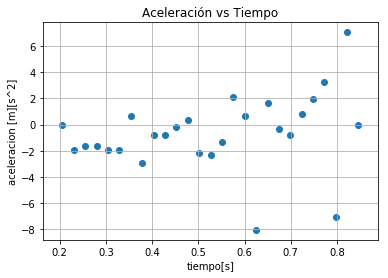

In [14]:
#la aceleración se determina utilizando diferencias de segundo orden 
for j in range (1,len(t)-1):
    a[j] = (y[j+1]+y[j-1]-2*y[j])/(dt**2)
plt.scatter(t,a)
plt.xlabel('tiempo[s]')
plt.ylabel('aceleracion [m][s^2]')
plt.title('Aceleración vs Tiempo')
plt.grid('on')

La aceleración del objeto debería tender a ser cero en la gráfica anterior, comportamiento que no se observa debido a la dispersión de los datos. A parte de lo anterior, puede que no se hallan tomado muestras en un intervalo de tiempo suficientemente grande para garantizar que se alcanzó la velocidad terminal y esta no logre apreciarse en los datos.

Para el modelo numérico, se debe fijar una velocidad terminal, esta velocidad terminal se establece a ojo una vez se observa la tendencia(gráfica inferior). Ya que no se tienen datos concluyentes, aproximadamente en el tiempo $t=0.7s$ se observa que la aceleración es $a=0$.

/home/roberto/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


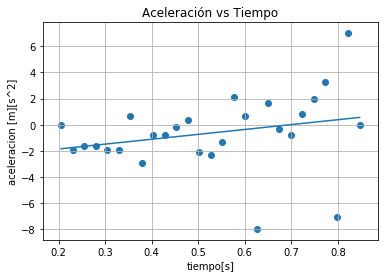

In [19]:
#modelo de regresión lineal 
from sklearn.linear_model import LinearRegression
x = t.reshape((-1, 1))
modelo = LinearRegression()
modelo.fit(x, a)
modelo = LinearRegression().fit(x, a)
r_sq = modelo.score(x, a)

tlineal = np.linspace(np.amin(t),np.amax(t),100)
alineal= modelo.coef_*tlineal+modelo.intercept_ #pendiente e intercepto determinados por el modelo de regresión
plt.plot(tlineal,alineal)
plt.scatter(t,a)
plt.xlabel('tiempo[s]')
plt.ylabel('aceleracion [m][s^2]')
plt.title('Aceleración vs Tiempo')
plt.grid('on')

In [23]:
# se determina la posicion donde a = 0, en este caso en la grafica
# se escoge el 0.7, como se tiene el 0.699s en los datos temporales, se busca el indice y se 
# selecciona la velocidad de dicho indice, esta será la velocidad terminal
vter = v[20]
print('Velocidad terminal = %.4f m/s' %vter)

Velocidad terminal = 0.6559 m/s


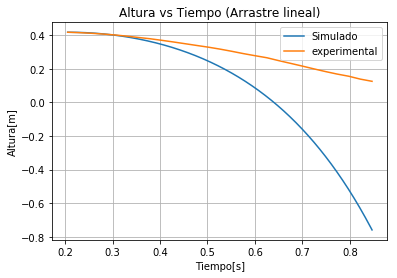

In [33]:
from EULER import * #importo la clase euler para realizar la solución de la edo de forma numérica
#parámetros de simulación
g = 9.8
vo = 0 #velocidad inicial
yo = np.amax(y) #altura máxima
tmax = np.amax(t)#tiempo final
tmin = np.amin(t)#tiempo inicial
h = 0.001 #tamaño del paso
f_xy = '(9.8)*(-1+((y)/(0.6559)))' #función aceleración para modelo lineal de arrastre
evaluar_1 = euler_mejorado() ## algoritmo de euler mejorado 
x_y_1 = np.array(evaluar_1.euler_2do_m(f_xy,tmax,tmin,h,yo,vo))
t1 = x_y_1[0,:]
y1 = x_y_1[1,:]
v1 = x_y_1[2,:]
sim, = plt.plot(t1,y1, label ='Simulado')
exp, = plt.plot(t,y,label='experimental')
plt.ylabel('Altura[m]')
plt.xlabel('Tiempo[s]')
plt.title('Altura vs Tiempo (Arrastre lineal)')
plt.grid('on')
plt.legend(handles=[sim, exp])
plt.show()


Como se observa en la gráfica anterior, el rango de alturas no se corresponde entre los datos experimentales y simulados, por lo que se podría llegar a concluir a priori que la velocidad terminal seleccionada no es la indicada. Pero este modelo fué el de arrastre lineal (viscoso), por lo que hace falta verificar si el arrastre bajo el modelo cuadrático (presión) brinda un mejor resultado.

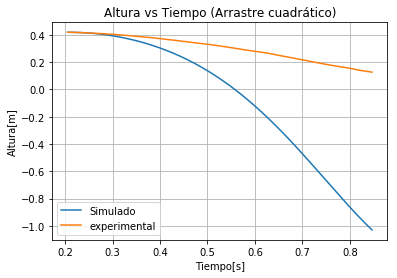

In [34]:
from EULER import * #importo la clase euler para realizar la solución de la edo de forma numérica
#parámetros de simulación
g = 9.8
vo = 0 #velocidad inicial
yo = np.amax(y) #altura máxima
tmax = np.amax(t)#tiempo final
tmin = np.amin(t)#tiempo inicial
h = 0.001 #tamaño del paso
f_xy = '(9.8)*(-1+((y*y)/(0.6559**2)))' #función aceleración para modelo lineal de arrastre
evaluar_1 = euler_mejorado() ## algoritmo de euler mejorado 
x_y_1 = np.array(evaluar_1.euler_2do_m(f_xy,tmax,tmin,h,yo,vo))
t1 = x_y_1[0,:]
y1 = x_y_1[1,:]
v1 = x_y_1[2,:]
sim, = plt.plot(t1,y1, label ='Simulado')
exp, = plt.plot(t,y,label='experimental')
plt.ylabel('Altura[m]')
plt.xlabel('Tiempo[s]')
plt.title('Altura vs Tiempo (Arrastre cuadrático)')
plt.grid('on')
plt.legend(handles=[sim, exp])
plt.show()

En este caso el comportamiendo es similar pero estalla a los pocos segundos de simulación. Se realiza un último modelo, usando la combinación de los dos modelos de arrastre, ya que puede que el objeto esté en un régimen mixto.

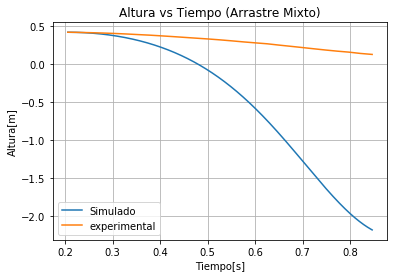

In [35]:
from EULER import * #importo la clase euler para realizar la solución de la edo de forma numérica
#parámetros de simulación
g = 9.8
vo = 0 #velocidad inicial
yo = np.amax(y) #altura máxima
tmax = np.amax(t)#tiempo final
tmin = np.amin(t)#tiempo inicial
h = 0.001 #tamaño del paso
f_xy = '(9.8)*(-1+((y*y)/(0.6559**2)))+(9.8)*(-1+((y)/(0.6559)))' #función aceleración para modelo lineal de arrastre
evaluar_1 = euler_mejorado() ## algoritmo de euler mejorado 
x_y_1 = np.array(evaluar_1.euler_2do_m(f_xy,tmax,tmin,h,yo,vo))
t1 = x_y_1[0,:]
y1 = x_y_1[1,:]
v1 = x_y_1[2,:]
sim, = plt.plot(t1,y1, label ='Simulado')
exp, = plt.plot(t,y,label='experimental')
plt.ylabel('Altura[m]')
plt.xlabel('Tiempo[s]')
plt.title('Altura vs Tiempo (Arrastre Mixto)')
plt.grid('on')
plt.legend(handles=[sim, exp])
plt.show()

NO se obtiene mejoría alguna, por lo que se puede concluir que la velocidad terminal seleccionada, no corresponde a la velocidad terminal del objeto en cuestión. Se selecciona entonces la velocidad en la posición que se ve a continuación:

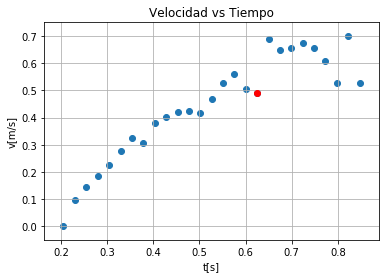

velocidad terminal seleccionada v = 0.4899 m/s


In [60]:
vter = v[17]
plt.scatter(t,v)
plt.plot(t[17],v[17],'ro')
plt.title('Velocidad vs Tiempo')
plt.xlabel('t[s]')
plt.ylabel('v[m/s]')
plt.grid('on')
plt.show()
print('velocidad terminal seleccionada v = %.4f m/s'%vter)

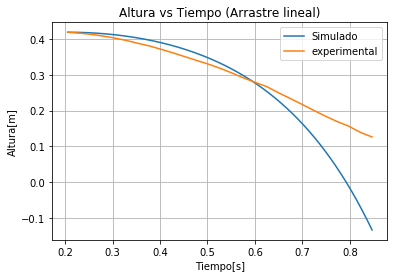

In [61]:
from EULER import * #importo la clase euler para realizar la solución de la edo de forma numérica
#parámetros de simulación
g = 9.8
vo = 0 #velocidad inicial
yo = np.amax(y) #altura máxima
tmax = np.amax(t)#tiempo final
tmin = np.amin(t)#tiempo inicial
h = 0.001 #tamaño del paso
f_xy = '(9.8)*(-1+((y)/(0.4899)))' #función aceleración para modelo lineal de arrastre
evaluar_1 = euler_mejorado() ## algoritmo de euler mejorado 
x_y_1 = np.array(evaluar_1.euler_2do_m(f_xy,tmax,tmin,h,yo,vo))
t1 = x_y_1[0,:]
y1 = x_y_1[1,:]
v1 = x_y_1[2,:]
sim, = plt.plot(t1,y1, label ='Simulado')
exp, = plt.plot(t,y,label='experimental')
plt.ylabel('Altura[m]')
plt.xlabel('Tiempo[s]')
plt.title('Altura vs Tiempo (Arrastre lineal)')
plt.grid('on')
plt.legend(handles=[sim, exp])
plt.show()

Se nota una mejoría en la correspondencia de los datos para el modelo de arrastre lineal. Usando el modelo cuadrático se obtiene lo que sigue:

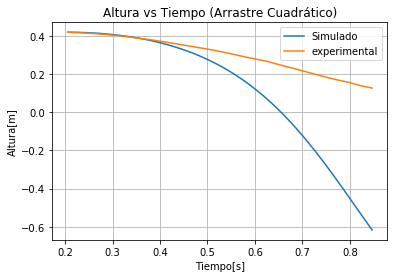

In [62]:
from EULER import * #importo la clase euler para realizar la solución de la edo de forma numérica
#parámetros de simulación
g = 9.8
vo = 0 #velocidad inicial
yo = np.amax(y) #altura máxima
tmax = np.amax(t)#tiempo final
tmin = np.amin(t)#tiempo inicial
h = 0.001 #tamaño del paso
f_xy = '(9.8)*(-1+((y*y)/(0.4899**2)))' #función aceleración para modelo lineal de arrastre
evaluar_1 = euler_mejorado() ## algoritmo de euler mejorado 
x_y_1 = np.array(evaluar_1.euler_2do_m(f_xy,tmax,tmin,h,yo,vo))
t1 = x_y_1[0,:]
y1 = x_y_1[1,:]
v1 = x_y_1[2,:]
sim, = plt.plot(t1,y1, label ='Simulado')
exp, = plt.plot(t,y,label='experimental')
plt.ylabel('Altura[m]')
plt.xlabel('Tiempo[s]')
plt.title('Altura vs Tiempo (Arrastre Cuadrático)')
plt.grid('on')
plt.legend(handles=[sim, exp])
plt.show()

No se aprecia correspondencia en el modelo cuadrático. Por último se implementa el modelo mixto para poder concluir en qué regimen se encuentra el objeto (lineal o cuadrático):

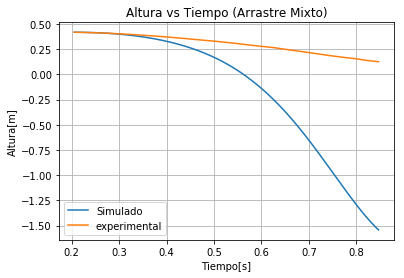

In [63]:
from EULER import * #importo la clase euler para realizar la solución de la edo de forma numérica
#parámetros de simulación
g = 9.8
vo = 0 #velocidad inicial
yo = np.amax(y) #altura máxima
tmax = np.amax(t)#tiempo final
tmin = np.amin(t)#tiempo inicial
h = 0.001 #tamaño del paso
f_xy = '(9.8)*(-1+((y*y)/(0.4899**2)))+(9.8)*(-1+((y)/(0.4899)))' #función aceleración para modelo lineal de arrastre
evaluar_1 = euler_mejorado() ## algoritmo de euler mejorado 
x_y_1 = np.array(evaluar_1.euler_2do_m(f_xy,tmax,tmin,h,yo,vo))
t1 = x_y_1[0,:]
y1 = x_y_1[1,:]
v1 = x_y_1[2,:]
sim, = plt.plot(t1,y1, label ='Simulado')
exp, = plt.plot(t,y,label='experimental')
plt.ylabel('Altura[m]')
plt.xlabel('Tiempo[s]')
plt.title('Altura vs Tiempo (Arrastre Mixto)')
plt.grid('on')
plt.legend(handles=[sim, exp])
plt.show()

De la gráfica anterior se puede concluir que el objeto se encuentra en el régimen de arrastre lineal.

Jugando un poco con los valores de la velocidad terminal, se logra apreciar que una velocidad terminal más idonea corresponde a $v = 0.451$m/s, para verificar esto, se necesitarían más datos experimentales.

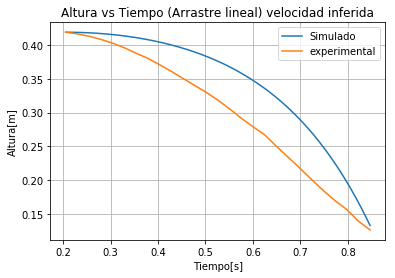

In [71]:
from EULER import * #importo la clase euler para realizar la solución de la edo de forma numérica
#parámetros de simulación
g = 9.8
vo = 0 #velocidad inicial
yo = np.amax(y) #altura máxima
tmax = np.amax(t)#tiempo final
tmin = np.amin(t)#tiempo inicial
h = 0.001 #tamaño del paso
f_xy = '(9.8)*(-1+((y)/(0.451)))' #función aceleración para modelo lineal de arrastre
evaluar_1 = euler_mejorado() ## algoritmo de euler mejorado 
x_y_1 = np.array(evaluar_1.euler_2do_m(f_xy,tmax,tmin,h,yo,vo))
t1 = x_y_1[0,:]
y1 = x_y_1[1,:]
v1 = x_y_1[2,:]
sim, = plt.plot(t1,y1, label ='Simulado')
exp, = plt.plot(t,y,label='experimental')
plt.ylabel('Altura[m]')
plt.xlabel('Tiempo[s]')
plt.title('Altura vs Tiempo (Arrastre lineal) velocidad inferida')
plt.grid('on')
plt.legend(handles=[sim, exp])
plt.show()